/tmp/ipykernel_453/1999736710.py:14: RuntimeWarning: invalid value encountered in true_divide
  return ((hb/(np.pi*c))*(omega/(np.e**(hb*omega/(k*temperature))-1)))


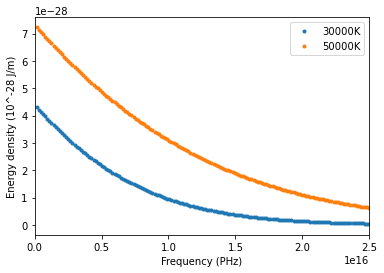

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
limit=1000
frequency_limit = np.linspace(0, 25, limit)
frequency = frequency_limit*10**15
hb=1.05459*10**(-34)
c=3*10**8
omega = frequency*2*np.pi
k= 1.38*10**(-23)
epsilon = 8.854*10**(-12)
tau = 2*limit*2*10**(-15)

def planck_formula(omega,temperature):
    return ((hb/(np.pi*c))*(omega/(np.e**(hb*omega/(k*temperature))-1)))
out_30000 = planck_formula(omega,30000)
out_50000 = planck_formula(omega,50000)
plot_30000 = plt.plot(omega,out_30000,'.',label='30000K')
plot_50000 = plt.plot(omega,out_50000,'.',label='50000K')
plt.xlim(0,25e15)
plt.xlabel ('Frequency (PHz)')
plt.ylabel('Energy density (10^-28 J/m)')
plt.legend()
plt.show()

In [6]:
def planck_formula_n(omega,temperature):
    return ((6*hb**2/(np.pi*(temperature**2)*k**2))*(abs(omega)/(np.e**(hb*abs(omega)/(k*temperature))-1)))
def rms(temperature):
    return((((2/(epsilon*6*hb*c))**0.5)*k*temperature))
out_30000_n = planck_formula_n(omega,30000)
out_50000_n = planck_formula_n(omega,50000)
rms_30000 = rms(30000)
rms_50000 = rms(50000)
print(rms_30000,rms_50000)

0.4516141108328581 0.7526901847214301


/tmp/ipykernel_352/3127680436.py:2: RuntimeWarning: invalid value encountered in true_divide
  return ((6*hb**2/(np.pi*(temperature**2)*k**2))*(abs(omega)/(np.e**(hb*abs(omega)/(k*temperature))-1)))


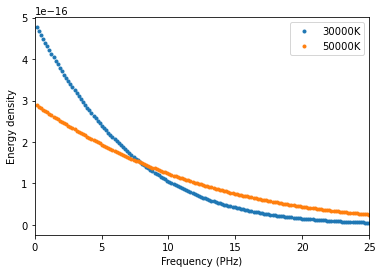

In [7]:
plot_30000 = plt.plot(frequency_limit*2*np.pi,out_30000_n,'.',label='30000K')
plot_50000 = plt.plot(frequency_limit*2*np.pi,out_50000_n,'.',label='50000K')
plt.xlim(0,25)
plt.xlabel ('Frequency (PHz)')
plt.ylabel('Energy density')
plt.legend()
plt.show()

In [4]:
M=2**21
tsim=7e-12
eps0 = 8.854187e-12
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
deltap = np.sqrt(1/3/eps0/hbar/c)*kb
def Es(tj,T):
    hdk=7.63823258e-12
    #Es0 = rand()*np.sqrt(6*hdk/np.pi/T)
    Esm = 0
    for j in range(-M,M-1,1):
        wl = 2*np.pi*j/tsim
        if j == 0:
            Es0 = rand1()*np.sqrt(6*hdk**2/np.pi/T)
        else:
            Esm = Esm + (rand1()*np.cos(wl*tj)-rand2()*np.sin(wl*tj))*planck_formula_n(wl,T)
    return deltap*T*(Es0 + Esm)/np.sqrt(tsim)

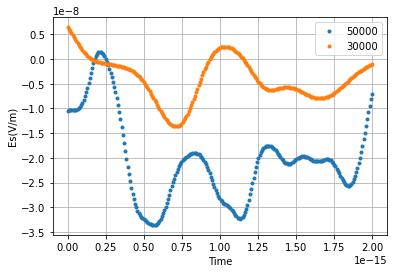

In [5]:
def rand1():
    return np.random.normal(0,1)
def rand2():
    return np.random.normal(0,1)
tl = np.linspace(0,2e-15,250)
T = 50000
plt.plot(tl,Es(tl,T),'.',label=50000)
tl = np.linspace(0,2e-15,250)
T = 30000
Es = Es(tl,T)
plt.plot(tl,Es,'.',label=30000)
plt.xlabel('Time')
plt.ylabel('Es(V/m)')
plt.grid()
plt.legend()

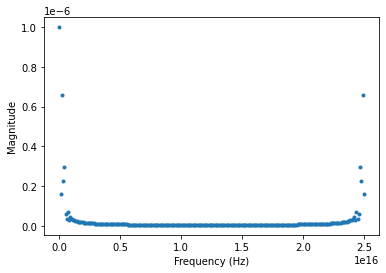

In [6]:
dft = np.fft.fft(Es)

# Compute the frequencies associated with each DFT coefficient
freqs = np.linspace(0,25*1e15,250)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(freqs,abs(dft),'.')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()